In [1]:
from matplotlib import rc as mplrc
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Basic Basics

Python is not a compiled language but is rather an interpreted language. That means there's no checking before running like a compiler would. As a result, errors that would otherwise be caught by a compiler might come up during runtime. The benefit is that you don't need to recompile after editing.

Basic syntax

Loops:

Python loop/list indexing starts from 0 and bounds are exclusive.

In [2]:
start_value = 0
end_value = 9
increment_value = 1

for i in range(start_value, end_value + 1, increment_value):
    print(i)

0
1
2
3
4
5
6
7
8
9


By default, start_value = 0 and increment_value = 1

In [81]:
i = 0
# while loop
while np.sin(i) >= 0.:
    # end="\r" clears the previous line before printing (i.e. overwrites previous output
    # Good for printing during loops because it doesn't make a bunch of output
    print(i, end="\r")
    i += 1
    # make sure there's an update condition! otherwise it'll run forever

We can also nest loops, just make sure there are no overlaping indices

In [4]:
sum = 0
for i in range(5):
    for j in range(5):
        sum += i * j
sum

100

Lists:

A basic type in Python is a list (array in some languages). They are an ordered collection of entries (ordered by index, not value). They are mutable, so you can change one once it's defined. This is in contrast to tuples and sets. Tuples are essentially immutable lists and sets are tuples with no repeated values. A value is indexed from a list with brackets and the index.

In [5]:
foo = [1, 2, 3, 3, 5, 9, 10]
foo[1]

2

You can access a subset of list with colons inside the brackets with the syntax of \[start\_value:end\_value + 1:increment\_value\]

In [6]:
foo[0:4:2]

[1, 3]

We can also change types

In [7]:
set(foo)

{1, 2, 3, 5, 9, 10}

Dictionaries are an unordered collection of data with key-entry pairs. The entry values are accessed by putting the key in brackets (no repeat keys).

In [8]:
foo = {1: 2, 3: 4}
foo[3]

4

List comprehension is a method of making lists/tuples/dictionaries without loops

In [9]:
foo = list(i for i in range(6))
foo

[0, 1, 2, 3, 4, 5]

In [10]:
foo = dict((i, i **2) for i in range(6))
foo

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25}

You can also put conditions in list comprehension

In [11]:
# get only even values
foo = [i for i in range(6) if i % 2 == 0]
foo

[0, 2, 4]

We could've done the above with

In [12]:
foo = [i for i in range(0, 6, 2)]
foo

[0, 2, 4]

# Functions

Functions are some of the most important concepts in Python. Essentially all more complex aspects use functions to some extent. 

A function takes is defined with the "def" command followed by the function name, parentheses that contain any arguments, and a colon, e.g. 

In [13]:
def foo(x, y, z):
    """This function prints the arguments"""

    print(f"x = {x}, y = {y}, z = {z}")
    

In [14]:
foo(1., 2., 3.)

x = 1.0, y = 2.0, z = 3.0


Functions can also return things, numbers, string, lists, objects, etc. can all be output using "return" at the end of the function

In [15]:
def foo(x, y):
    """Returns the sum of the squares of the arguments"""
    return x ** 2 + y ** 2

In [16]:
foo(1., 2.)

5.0

The previous functions use "positional arguments." These arguments are passed into the function in an order that is specified in the function definition. You can make them "keyword" arguments by setting a default value

In [17]:
def foo(x, y = 1.):
    """Returns the sum of squares with a default argument"""

    return x ** 2 + y ** 2
    

In [18]:
print(foo(1.))
print(foo(1., y=6.))

2.0
37.0


You can also pass these in as lists or dictionaries (positional arguments are lists with a single asterisk in front and keywords arguments are dictionaries with two asterisks in front

In [19]:
args = [1]
kwargs = {"y": 1}

In [20]:
foo(*args, **kwargs)

2

Python doesn't enforce types like other languages, but you can do "type hinting" to allow users to see what's going on

In [21]:
def foo(x: float, y: float = 1.) -> float:
    """Returns the sum of squares"""

    return x ** 2 + y ** 2

# Objects

Python is an object-oriented language. Objects are used in many programming languages, e.g. Java. At the basic level, objects have attributes and methods. Attributes are variables that are assigned the object and methods are functions that the object can use. There is no enforced public/private scope for methods and attributes, but "private" things are typically denoted with an underscore in front of the name. For example, a Horse object might have an attribute that is its weight and the function of galloping. Objects in Python are defined with the "class" argument and must include and \_\_init\_\_ function. All methods must be defined with "self" as the first positional argument

In [22]:
class Animal():
    """An abstract animal class"""
    def __init__(self, height: float, weight: float, age: int, name: str, species: str):
        """You always need an __init__ function"""

        # set the attributes of the animal
        self.height = height # in inches
        self.weight = weight # in pounds
        self.age = age # in years
        self.name = name
        self.species = species


    def age_one_year(self):
        """Gets one year older"""
        self.age += 1

    def grow(self, weight_increase: float, height_increase: float):
        """Gets taller and fatter"""
        self.weight += weight_increase
        self.height += height_increase

    def have_a_birthday(self, weight_increase: float, height_increase: float):
        """Grows and ages on a birthday"""
        self.age_one_year()
        self.grow(weight_increase, height_increase)

    def get_volume(self) -> float:
        """Returns the spherical volume of the animal"""
        return (4. / 3.) * np.pi * (self.height / 2.) ** 3


In [23]:
charlie = Animal(3., 0.006, 1, "charlie", "Vermivora chrysoptera")

In [24]:
charlie.height

3.0

In [25]:
charlie.age

1

In [26]:
charlie.age_one_year()

In [27]:
charlie.age

2

In [28]:
charlie.have_a_birthday(0.001, 0.2)
print(charlie.age, charlie.weight, charlie.height)

3 0.007 3.2


In [29]:
charlie.get_volume()

17.15728467880506

## Inheritance

An important aspect of objects in Python is inheritance. Essentially, subclasses can be defined. They will have all attributes and methods of the parent class but can be modified for more specific purposes. This is done with putting the superclass name in parentheses during the definition. During \_\_init\_\_, the superclass is first initialized with super.\_\_init()\_\_ where arguments relating to the parent class can be passed into the function

In [30]:
class Human(Animal):
    """Humans are a specific type of animal that can do unique things"""
    def __init__(self, height: float, weight: float, age: int, name: str, IQ: float, work_ethic: float):
        # initialize the parent class
        super().__init__(height, weight, age, name, "Homo sapiens")

        # assign specific attributes
        self.IQ = IQ 
        self.work_ethic = work_ethic # between 0 and 1

    def take_test(self, difficulty: float) -> float:
        """Takes a test with a given difficulty (between 0 and 100). Specific to humans."""

        rand = np.random.rand()
        
        # randomly guess if they're too lazy
        if rand > self.work_ethic:
            return 100. * np.random.rand()

        # a higher IQ or lower difficulty leads to higher score
        return np.tanh(self.IQ / difficulty)

    def have_a_birthday(self, weight_increase: float, height_increase: float):
        """Override parent class birthday"""
        self.IQ += (-1. ** int(self.age < 26)) * np.sin(self.age) # get smarter until you're 25
        self.age_one_year()
        self.grow(weight_increase, height_increase)
        

In [31]:
jeff = Human(70., 160., 30, "Jeff", 76., 0.99)

In [32]:
print(jeff.age, jeff.weight, jeff.height, jeff.IQ)

jeff.have_a_birthday(5., 1.)

print(jeff.age, jeff.weight, jeff.height, jeff.IQ)

30 160.0 70.0 76.0
31 165.0 71.0 76.98803162409286


In [33]:
print(f"Jeff got a {100.*jeff.take_test(95.):.1f} on the test")

Jeff got a 67.0 on the test


In [34]:
jeff.get_volume()

187401.76137316274

# Numpy

Numpy is arguably the most important package in Python. It is designed to deal with data/arrays in an extremely effecient manner (built on top of C). Almost anything you could ever want to do with an array is already implemented in numpy (arrays are the objects in numpy that correspond to lists)

In [35]:
foo = np.array([1, 2, 3])

You can easily do operations

In [36]:
foo + 5

array([6, 7, 8])

In [37]:
foo * 6

array([ 6, 12, 18])

In [38]:
np.exp(-foo)

array([0.36787944, 0.13533528, 0.04978707])

In [39]:
bar = np.array([6, 7, 8])

In [40]:
# elementwise multiplication
foo * bar

array([ 6, 14, 24])

In [41]:
# dot product (or matrix multiplication with higher dimensions)
foo @ bar

44

In [42]:
# make a 5x5 array of gaussian noise
foo = np.random.randn(5, 5)

In [43]:
# make a sparse array with the same dimensions
bar = np.zeros_like(foo)

In [44]:
bar.shape == foo.shape

True

Unlike native Python lists, multidimensional numpy arrays can be indexed in a single set of brackets

In [45]:
# get a single value
foo[0, 0]

-1.4286763434546028

In [46]:
# get a sub array
foo[1:3, 2:4]

array([[-1.79791882, -0.73822385],
       [-0.49059793,  0.37530204]])

Numpy arrays can be indexed and manipulated according to conditions

In [47]:
foo = np.array(range(10))
bar = np.array(range(0, 20, 2))

In [48]:
# do they have any of the same elements at the same index?
np.any(foo == bar)

True

In [49]:
# are they identical?
np.all(foo == bar)

False

In [50]:
# how many matches are there?
np.sum(foo == bar)

1

In [51]:
# find where they are the same value
matched_indices = np.where(foo == bar)
foo[matched_indices], bar[matched_indices]

(array([0]), array([0]))

In [52]:
# replace all odd values with 7
foo[foo % 2 == 1] = 7
foo

array([0, 7, 2, 7, 4, 7, 6, 7, 8, 7])

Special numbers such as nan and inf can be used with numpy. Finding and manipulating NaNs and infinity can be important during data processing since they are often used to fill missing values or indicate some error in data taking.

In [53]:
# make an arrray (needs to be of floats)
foo = np.random.randn(10)
# assign NaN and inf to 1st and 2nd entry
foo[0] = np.nan
foo[1] = np.inf
# find where they are
# Multilple conditions inside of np.where() need to be separated by parantheses and use "|" and "&" rather than "or" and "and"
# Because nan and inf aren't normal numbers, we use np.isnan and np.isinf to check for equality
bad_indices = np.where((np.isnan(foo)) | (np.isinf(foo)))
foo[bad_indices]

array([nan, inf])

Arrays can be saved and loaded (which we aren't going to actually do)

In [54]:
# np.save("file_path", foo)
# foo = np.load("file_path.npy", allow_pickle=True)

It can often be useful to make grids

In [55]:
# make range x range
xmax, num_x = 100, 10
xs = np.linspace(-xmax, xmax, num_x)

# turn into x and y grids
gx = np.tile(xs, (num_x, 1))
gy = np.tile(xs, (num_x, 1)).T

# turn into r, phi grid
gr = np.sqrt(gx**2 + gy**2)
gphi = np.arctan2(gy, gx)

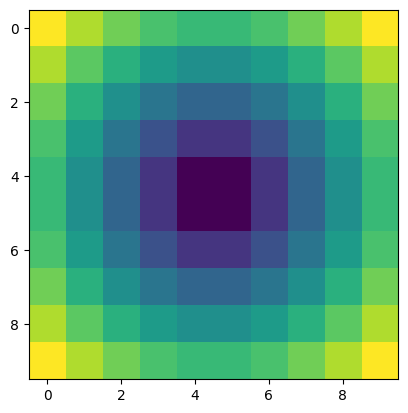

In [56]:
plt.imshow(gr)

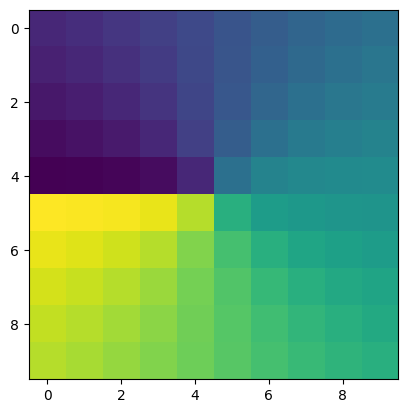

In [57]:
plt.imshow(gphi)

# Matplotlib

Matplotlib is likely the most commonly used plotting package in Python. Seaborn is a higher level wrapper on top of it that is a bit more user friendly for some types of graphs.

In [58]:
### plot settings ###
## font sizes
labels = 1.25 * 18  ## x/ylabel
legends = 1.25 * 16  ## legend
ticks = 1.25 * 14  ## x/yticks
titles = 1.25 * 18  # title
lw = 3  # line width
s = 50  # scatter point size (ps)
text = 26  # text size

# colors
cmap = "magma"
diverging_cmap = "RdBu_r"
categorical_cmap = "Set2"
# custom colormap
colors = [
    "firebrick",
    "steelblue",
    "darkorange",
    "darkviolet",
    "cyan",
    "magenta",
    "darkgreen",
    "deeppink",
]
# colors for overlaid contours
overlay_colors = ["cyan", "lime", "magenta", "lightsalmon"]

# marker and lines
markers = ["x", "o", "+", ">", "*", "D", "4"]
linestyles = ["-", "--", ":", "-."]


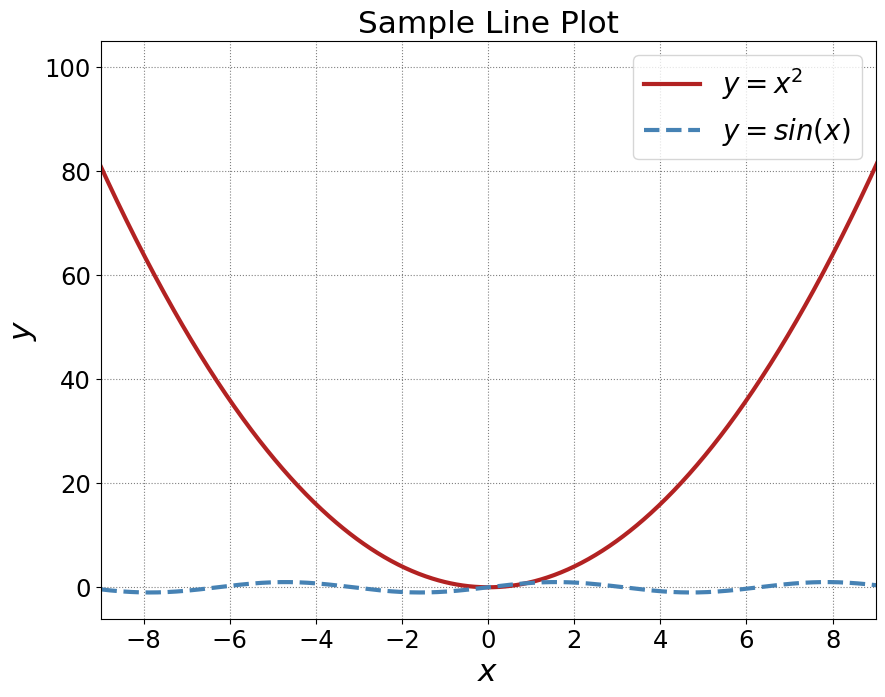

In [59]:
# make a simple plot
xs = np.linspace(-10, 10, 1000)

# initialize the figure
plt.figure(figsize=(10., 7.5))

# plot some curves 
# lw = line width
# color = c = line color
# ls = linestyle (-, --, :, -.)
plt.plot(xs, xs ** 2, lw=lw, color=colors[0], ls="-", label=r"$y = x^{2}$")
plt.plot(xs, np.sin(xs), lw=lw, c=colors[1], ls="--", label=r"$y = sin(x)$")

# add a legend
plt.legend(loc="best", fontsize=legends)

# set tick size
plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)

# add axis labels
plt.ylabel(r"$y$", fontsize=labels)
plt.xlabel(r"$x$", fontsize=labels)

# add a title
plt.title("Sample Line Plot", fontsize=titles)

# add a grid
plt.grid(True, ls=":", c="gray")

# set a limit to the x axis
plt.xlim(-9., 9.)

# plt.savefig("plot.pdf")

plt.show()

We can also use scatter plots

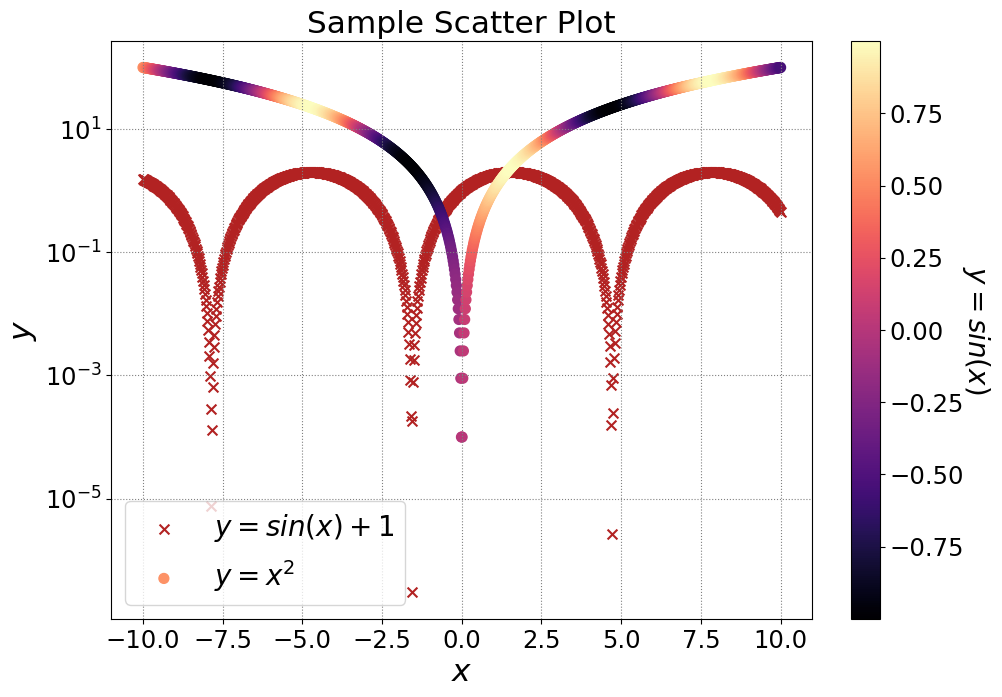

In [60]:
# make a simple plot
xs = np.linspace(-10, 10, 1000)

# initialize the figure
plt.figure(figsize=(10., 7.5))

# plot some curves 
# marker = marker type
# color = point color
# s = marker sie
plt.scatter(xs, np.sin(xs) + 1, color=colors[0], marker="x", s=s, label=r"$y = sin(x) + 1$")

# color this one by the value of sin(x)
# we replace color with c and add the cmap argument
scat = plt.scatter(xs, xs ** 2, c=np.sin(xs), cmap="magma", s=s, marker="o", label=r"$y = x^{2}$")
cbar = plt.colorbar(scat, fraction=0.045)
cbar.ax.set_ylabel(r"$y = sin(x)$", rotation=270, fontsize=legends)
cbar.ax.tick_params(labelsize=ticks)
cbar.ax.get_yaxis().labelpad = 20

# add a legend
plt.legend(loc="best", fontsize=legends)

# set tick size
plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)

# add axis labels
plt.ylabel(r"$y$", fontsize=labels)
plt.xlabel(r"$x$", fontsize=labels)

# add a title
plt.title("Sample Scatter Plot", fontsize=titles)

# add a grid
plt.grid(True, ls=":", c="gray")

# make the y axis a log scale
plt.yscale("log")

# plt.savefig("plot.pdf")

plt.show()

Can do plots in polar coordinates

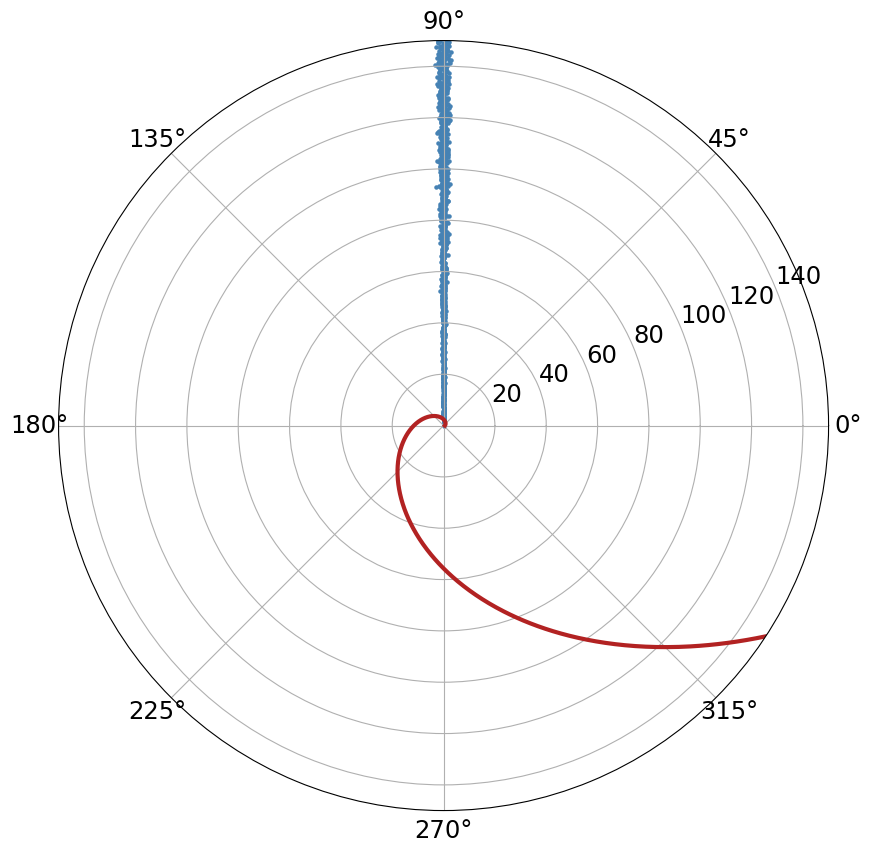

In [61]:
# set plotting parameters before
mplrc("xtick", labelsize=ticks)
mplrc("ytick", labelsize=ticks)
mplrc('axes', titlesize=titles, labelsize=labels)

fig, ax = plt.subplots(figsize=(10., 10.), subplot_kw={"projection": "polar"})

# line right up the middle
rs, thetas = np.linspace(0, 150, 1000), np.repeat(np.pi/2, 1000)
ax.scatter(thetas + np.random.randn(thetas.shape[0])/100, rs, s=s/10, c=colors[1])

thetas = np.linspace(0., 2. * np.pi, 1000)
a, b = 0.5, 1
rs = a * np.exp(b * thetas)
ax.plot(thetas, rs, lw=lw, color=colors[0])

ax.set_ylim(0, 150)

plt.show()

We can do the same thing with images

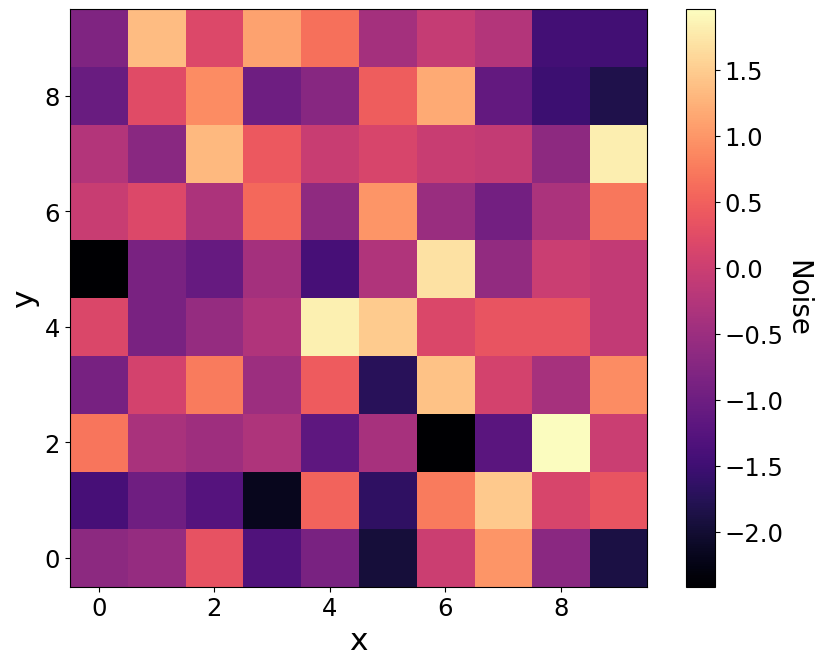

In [62]:
# initialize the figure
plt.figure(figsize=(10., 7.5))

# plot some curves 
# cmap = colormap
# origin = where is (0, 0)
im = plt.imshow(np.random.randn(10, 10), cmap="magma", origin="lower")

cbar = plt.colorbar(im, fraction=0.045)
cbar.ax.set_ylabel("Noise", rotation=270, fontsize=legends)
cbar.ax.tick_params(labelsize=ticks)
cbar.ax.get_yaxis().labelpad = 20

# set tick size
plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)

# add axis labels
plt.ylabel(r"y", fontsize=labels)
plt.xlabel(r"x", fontsize=labels)


# plt.savefig("plot.pdf")

plt.show()

We can smooth the image with an interpolation or set limits

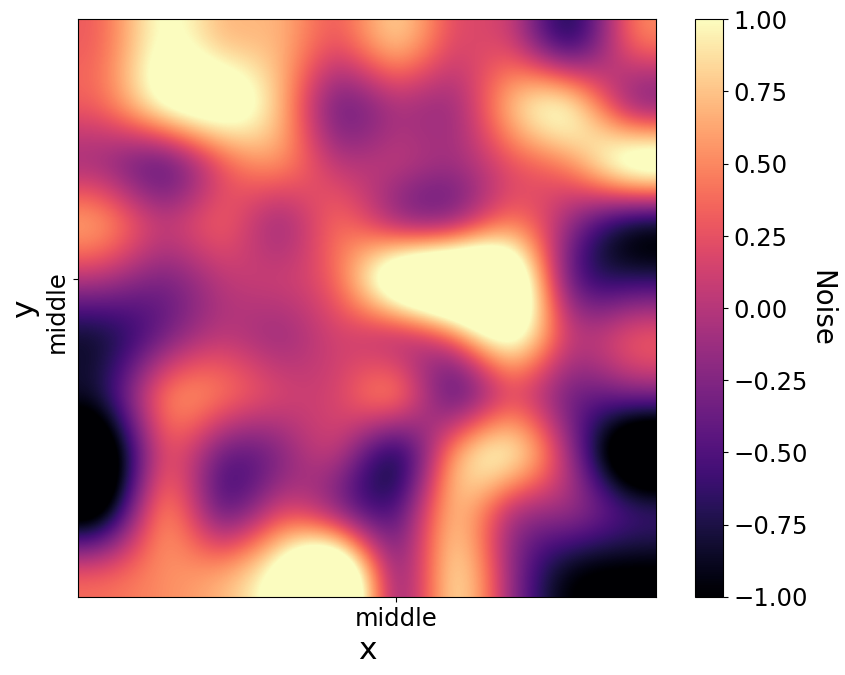

In [63]:
# initialize the figure
plt.figure(figsize=(10., 7.5))

# plot some curves 
# cmap = colormap
# origin = where is (0, 0)
im = plt.imshow(np.random.randn(10, 10), cmap="magma", origin="lower", interpolation="bicubic", vmin=-1., vmax=1.)

cbar = plt.colorbar(im, fraction=0.045)
cbar.ax.set_ylabel("Noise", rotation=270, fontsize=legends)
cbar.ax.tick_params(labelsize=ticks)
cbar.ax.get_yaxis().labelpad = 20

# set tick parameters
plt.xticks(ticks=[5], labels=["middle"], fontsize=ticks)
plt.yticks(ticks=[5], labels=["middle"], fontsize=ticks, rotation=90)

# add axis labels
plt.ylabel(r"y", fontsize=labels)
plt.xlabel(r"x", fontsize=labels)


# plt.savefig("plot.pdf")

plt.show()

We can also log the image

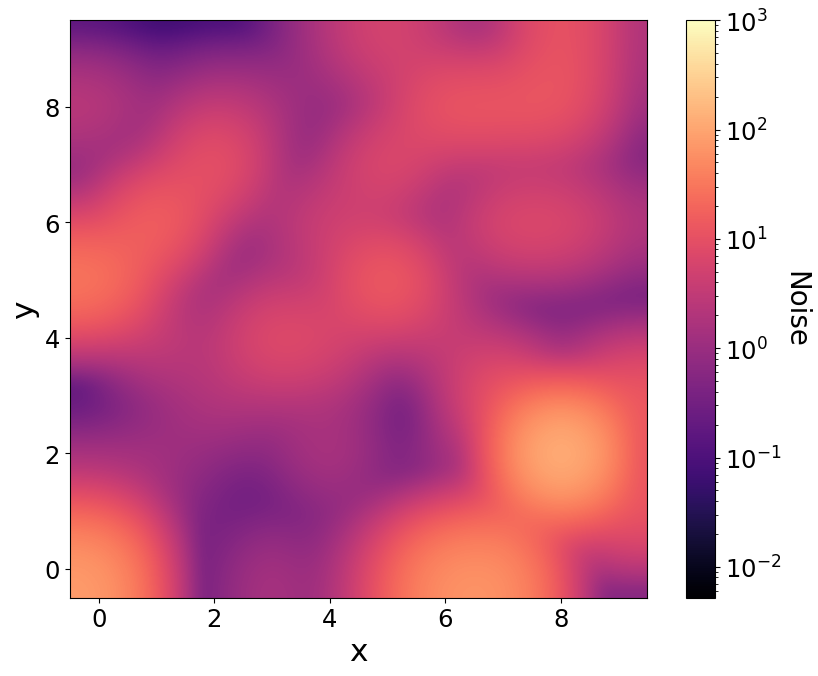

In [64]:
# initialize the figure
plt.figure(figsize=(10., 7.5))

# plot some curves 
# cmap = colormap
# origin = where is (0, 0)
norm = LogNorm(vmin=None, vmax=1000)
im = plt.imshow(10. ** np.random.randn(10, 10) , cmap="magma", origin="lower", interpolation="bicubic", norm=norm)

cbar = plt.colorbar(im, fraction=0.045)
cbar.ax.set_ylabel("Noise", rotation=270, fontsize=legends)
cbar.ax.tick_params(labelsize=ticks)
cbar.ax.get_yaxis().labelpad = 20

# set tick size
plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)

# add axis labels
plt.ylabel(r"y", fontsize=labels)
plt.xlabel(r"x", fontsize=labels)


# plt.savefig("plot.pdf")

plt.show()

We can add contours

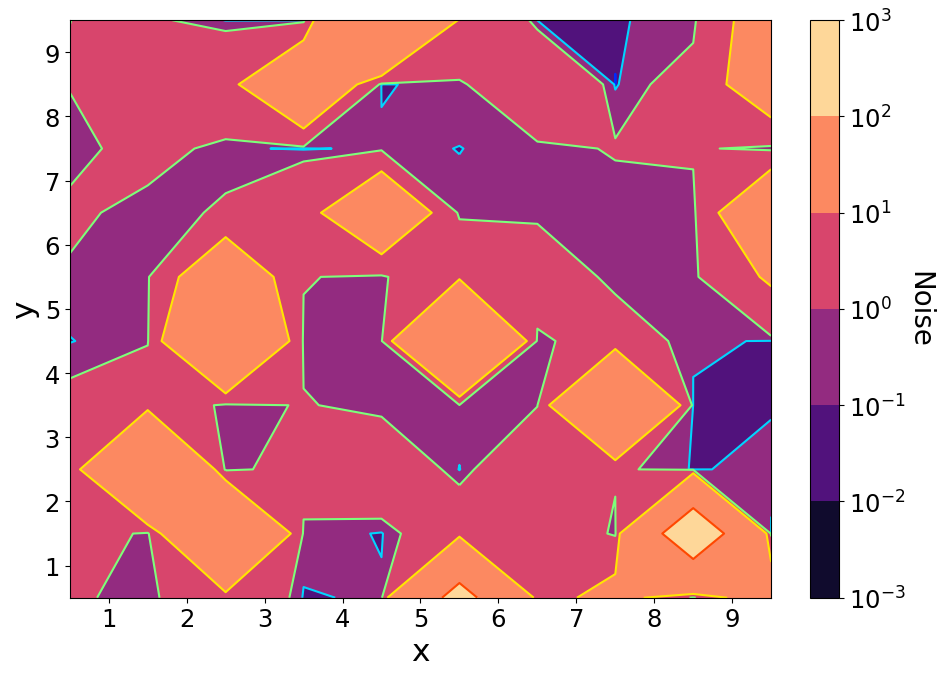

In [65]:
# initialize the figure
plt.figure(figsize=(10., 7.5))

# plot some curves 
# cmap = colormap
# origin = where is (0, 0)
data = np.zeros_like(gphi)
data += 10 ** np.random.randn(gphi.shape[0], gphi.shape[1])
norm = LogNorm(vmin=None, vmax=1000)
im = plt.contourf(data, cmap="magma", origin="lower", norm=norm)

plt.contour(data, cmap="jet", levels=10, origin="lower", norm=norm)

cbar = plt.colorbar(im, fraction=0.045)
cbar.ax.set_ylabel("Noise", rotation=270, fontsize=legends)
cbar.ax.tick_params(labelsize=ticks)
cbar.ax.get_yaxis().labelpad = 20

# set tick size
plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)

# add axis labels
plt.ylabel(r"y", fontsize=labels)
plt.xlabel(r"x", fontsize=labels)


# plt.savefig("plot.pdf")

plt.show()

It's also often useful to make multiple subplots

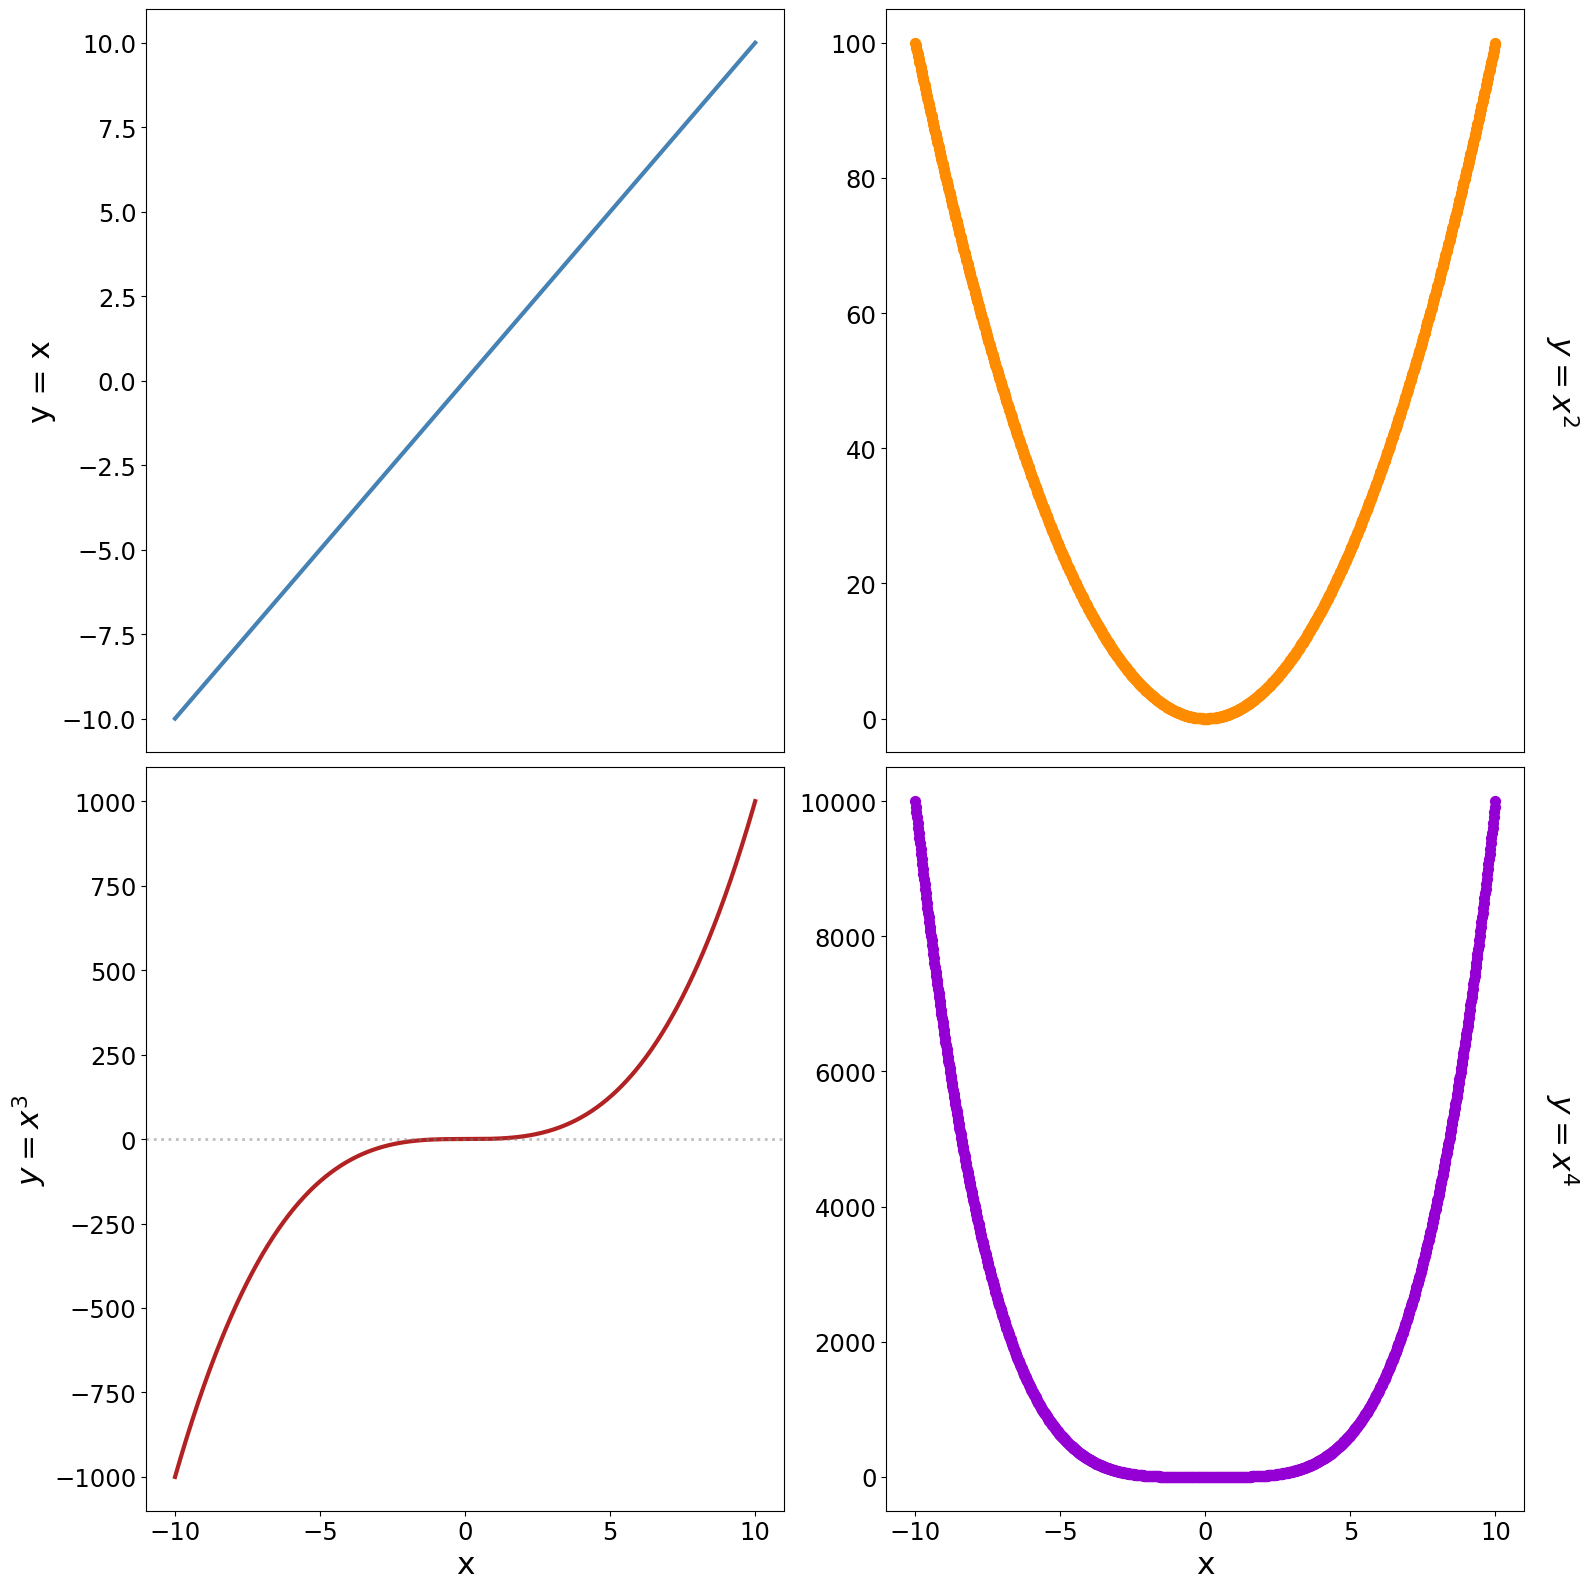

In [66]:
# set plotting parameters before
mplrc("xtick", labelsize=ticks)
mplrc("ytick", labelsize=ticks)
mplrc('axes', titlesize=titles, labelsize=labels)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16., 16.))


# top left subplot is axs[0, 0]
ax = axs[0, 0]

ax.plot(xs, xs, lw=lw, c=colors[1])
ax.set_xlabel("")
ax.set_ylabel("y = x")
ax.set_xticks([])

ax = axs[0, 1]
ax.scatter(xs, xs ** 2, s=s, color=colors[2])
ax.set_xlabel("")
ax.set_ylabel(r"$y = x^{2}$", rotation=-90., labelpad=40.)
ax.yaxis.set_label_position("right")
ax.set_xticks([])

ax = axs[1, 0]

ax.plot(xs, xs ** 3, lw=lw, c=colors[0])
ax.axhline(0, ls=":", lw=lw-1, c="gray", alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel(r"$y = x^{3}$")

ax = axs[1, 1]
ax.scatter(xs, xs ** 4, s=s, color=colors[3])
ax.set_xlabel("x")
ax.set_ylabel(r"$y = x^{4}$", rotation=-90., labelpad=40.)
ax.yaxis.set_label_position("right")
plt.tight_layout()

plt.show()



# Pandas

Pandas is one of the most popular packages to deal with data in Python. It is largely built on numpy, so there is a lot of overlap between syntax etc.

The fundamental object in pandas is a DataFrame. This stores tabular data (structured rows and columns) in a way that can be easily indexed and manipulated.

In [67]:
data_file = "data_cube.txt"

In [68]:
df = pd.read_csv(data_file, # path to file
                 skiprows=7, # the first 7 rows are metadata
                 header=None, # we'll manually give the columns names
                 sep="\t",  # \t between each column
                 names=["y", "x", "wl", "intensity"], # names of columns 
                 usecols=[0, 1, 2, 4], # we don't care about the 4th column
           )

In [69]:
df.head()

,y,x,wl,intensity
0,0,0,625.171,3509.0
1,0,0,625.423,3535.0
2,0,0,625.676,3505.0
3,0,0,625.928,3505.0
4,0,0,626.180,3505.0


In [70]:
df.sample(5)

,y,x,wl,intensity
59211,7,73,627.441,3667.0
37931,5,8,628.702,3543.0
331803,44,51,638.789,23240.0
412665,55,43,633.493,20408.0
521600,70,18,642.318,3556.0


Similar to numpy arrays, you can select a subset of the dataframe with conditionals

In [71]:
min_wl = 640.
max_wl = 645.

In [72]:
# you need to do parantheses when there are multiple conditions
# you also need to use "&" for "and" or "|" for "or"
# numpy follows these conventions too
trim_df = df[(df["wl"] > min_wl) & (df["wl"] < max_wl)]
trim_df.head()

,y,x,wl,intensity
59,0,0,640.049,3544.0
60,0,0,640.301,3562.0
61,0,0,640.554,3577.0
62,0,0,640.806,3559.0
63,0,0,641.058,3555.0


In [73]:
# clear memory
trim_df = None

Pandas naturally integrates into numpy arrays with "to_numpy()"

It can also be useful to sometimes know the unique values in the data. For example, the above data has the same wavelengths for each position, so all wavelengths can be described with a single array. This is done with "np.unique()"

In [74]:
wavelengths = np.unique(df["wl"].to_numpy())
wavelengths

array([625.171, 625.423, 625.676, 625.928, 626.18 , 626.432, 626.684,
       626.937, 627.189, 627.441, 627.693, 627.945, 628.198, 628.45 ,
       628.702, 628.954, 629.206, 629.459, 629.711, 629.963, 630.215,
       630.467, 630.72 , 630.972, 631.224, 631.476, 631.728, 631.98 ,
       632.233, 632.485, 632.737, 632.989, 633.241, 633.493, 633.746,
       633.998, 634.25 , 634.502, 634.754, 635.006, 635.259, 635.511,
       635.763, 636.015, 636.267, 636.519, 636.772, 637.024, 637.276,
       637.528, 637.78 , 638.032, 638.284, 638.537, 638.789, 639.041,
       639.293, 639.545, 639.797, 640.049, 640.301, 640.554, 640.806,
       641.058, 641.31 , 641.562, 641.814, 642.066, 642.318, 642.571,
       642.823, 643.075, 643.327, 643.579, 643.831, 644.083, 644.335,
       644.587, 644.839, 645.092, 645.344, 645.596, 645.848, 646.1  ,
       646.352, 646.604, 646.856, 647.108, 647.36 , 647.613, 647.865,
       648.117, 648.369, 648.621, 648.873, 649.125, 649.377, 649.629,
       649.881])

You can plot a single spectrum by combining the above two ideas

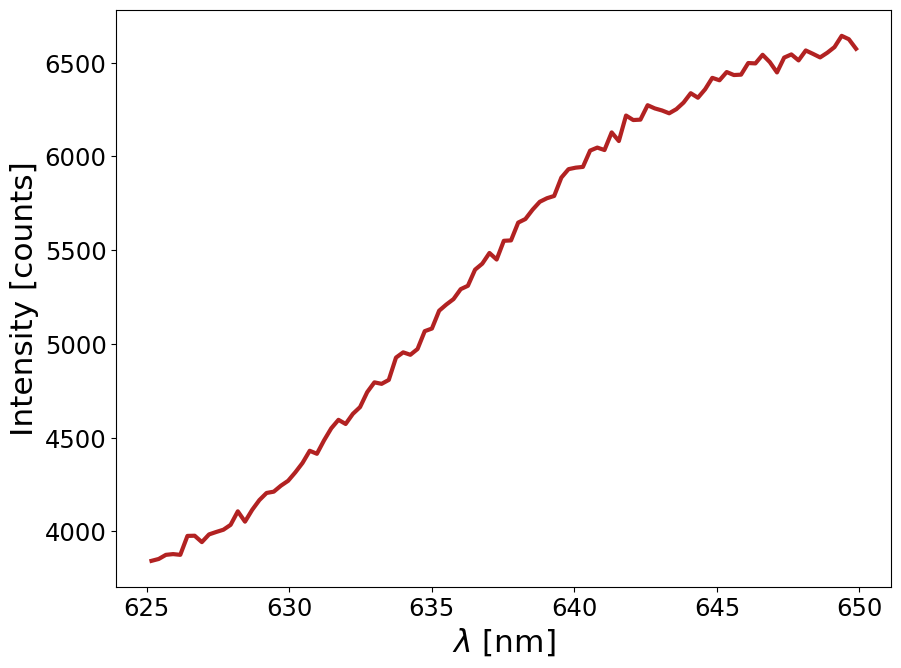

In [75]:
# what pixel are we plotting
x, y = 35, 35
df_ = df[(df["x"] == x) & (df["y"] == y)]
# using .wl is just a different way to access
wavelengths = df_.wl.to_numpy()
intensity = df_.intensity.to_numpy()
df_ = None

# initialize the figure
plt.figure(figsize=(10., 7.5))

# plot some curves 
# lw = line width
# color = c = line color
# ls = linestyle (-, --, :, -.)
plt.plot(wavelengths, intensity, lw=lw, color=colors[0])

# set tick size
plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)

# add axis labels
plt.xlabel(r"$\lambda$ [nm]", fontsize=labels)
plt.ylabel(r"Intensity [counts]", fontsize=labels)

# plt.savefig("plot.pdf")

plt.show()

It can be very convenient to represent this as a data cube (3D numpy array)

In [76]:
# get cube dimensions
num_wl = len(np.unique(df["wl"].to_numpy()))
num_x = len(np.unique(df["x"].to_numpy()))
num_y = len(np.unique(df["y"].to_numpy()))

# initialize empty cube
cube = np.empty((num_y, num_x, num_wl))

We can do this in two ways: iterating through the dataframe or over the cube

In [77]:
# iterate through the dataframe rows
# muuuuuuuuuuuch slower (I'm not even going to do it, but here's the code)
# for i, row in df.iterrows():
#     x = int(row.x)
#     y = int(row.y)
#     df_ = df[(df["x"] == x) & (df["y"] == y)]
#     intensities = df_.intensity.to_numpy()
#     cube[y, x, :] = intensities
# df_ = None

In [78]:
# we can also go over the dimensions
# this is much, much, much, much, much, much, much, much faster
for y in range(num_y):
    df_ = df[df["y"] == y]
    for x in range(num_x):
        intensities = df_[df_["x"] == x].intensity.to_numpy()
        cube[y, x, :] = intensities
df_ = None

Now we can conveniently inspect the data as either an image at a given wavelength or a spectrum at a given location

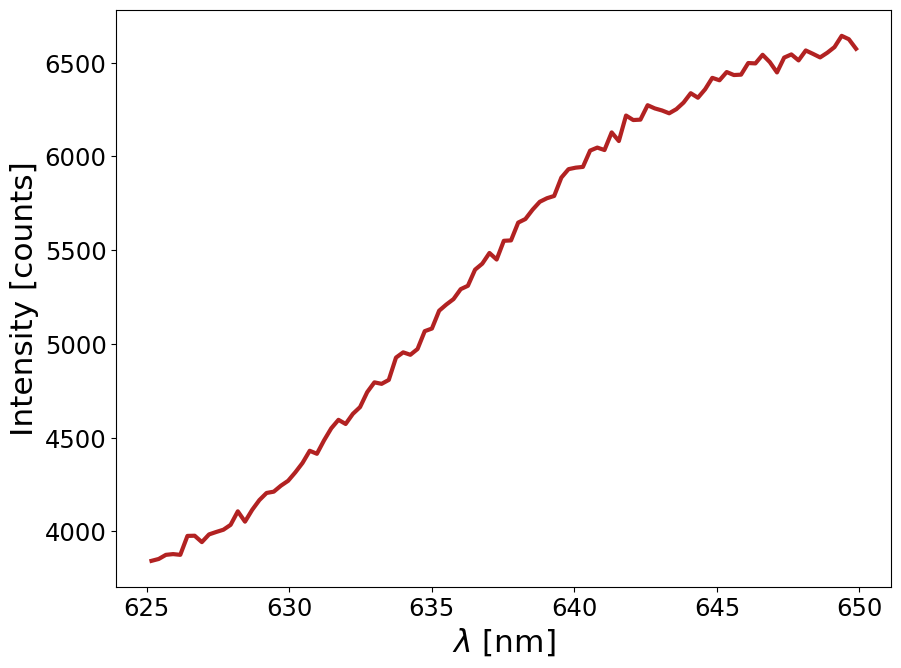

In [79]:
x, y = 35, 35
wavelengths = np.unique(df.wl.to_numpy())
intensity = cube[y, x, :]

# initialize the figure
plt.figure(figsize=(10., 7.5))

# plot some curves 
# lw = line width
# color = c = line color
# ls = linestyle (-, --, :, -.)
plt.plot(wavelengths, intensity, lw=lw, color=colors[0])

# set tick size
plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)

# add axis labels
plt.xlabel(r"$\lambda$ [nm]", fontsize=labels)
plt.ylabel(r"Intensity [counts]", fontsize=labels)

# plt.savefig("plot.pdf")

plt.show()

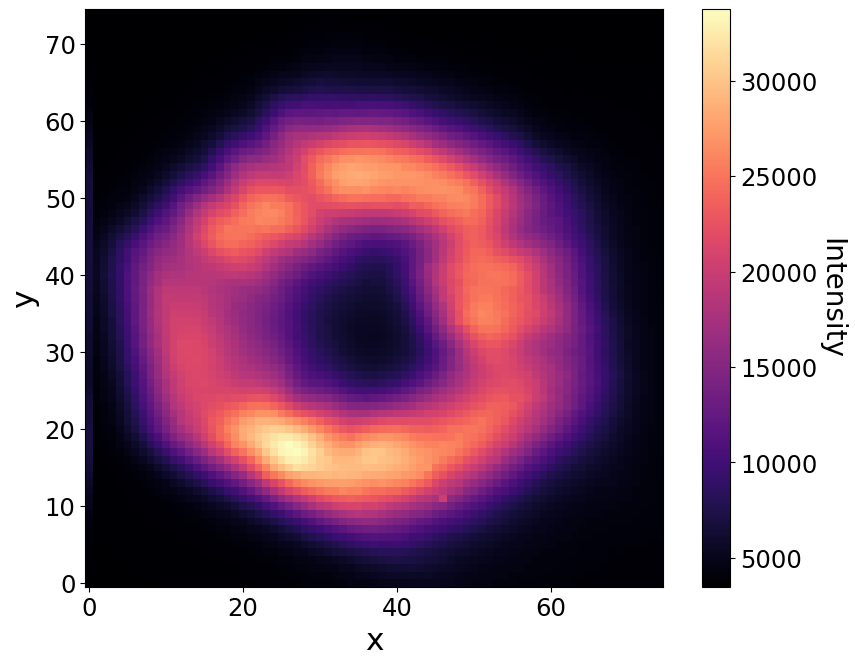

In [80]:
# now plot at a single wavelength
wavelength = 639.
# find the index for the wavelength closest to the wavelength we want to plot
index = np.argmin(np.abs(wavelengths - wavelength))

# get that layer
image = cube[:, :, index]

# initialize the figure
plt.figure(figsize=(10., 7.5))

# plot some curves 
# cmap = colormap
# origin = where is (0, 0)
im = plt.imshow(image, cmap="magma", origin="lower", interpolation="none",)

cbar = plt.colorbar(im, fraction=0.045)
cbar.ax.set_ylabel("Intensity", rotation=270, fontsize=legends)
cbar.ax.tick_params(labelsize=ticks)
cbar.ax.get_yaxis().labelpad = 20

# set tick parameters
plt.xticks(fontsize=ticks)
plt.yticks(fontsize=ticks)

# add axis labels
plt.ylabel(r"y", fontsize=labels)
plt.xlabel(r"x", fontsize=labels)

# plt.savefig("plot.pdf")

plt.show()